In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

##Import Data

###Using Pandas

In [3]:
train_df = pd.read_csv( "/content/Training.csv")
test_df = pd.read_csv("/content/Testing.csv")
train_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [5]:
train_df.info() #for data types,count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [6]:
# all of these are encoded data and types are integer.
train_df["indigestion"]

0       0
1       0
2       0
3       0
4       0
       ..
4915    0
4916    0
4917    0
4918    0
4919    0
Name: indigestion, Length: 4920, dtype: int64

In [7]:
train_df["prognosis"].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

Allergy                                    120
Peptic ulcer diseae                        120
Arthritis                                  120
Heart attack                               120
Bronchial Asthma                           120
Jaundice                                   120
Hepatitis C                                120
Typhoid                                    120
Psoriasis                                  120
Cervical spondylosis                       120
Urinary tract infection                    120
Impetigo                                   120
Common Cold                                120
Hypertension                               120
Hepatitis D                                120
Varicose veins                             120
Hepatitis B                                120
Paralysis (brain hemorrhage)               120
Drug Reaction                              120
Dengue                                     120
Tuberculosis                               120
Hepatitis E  

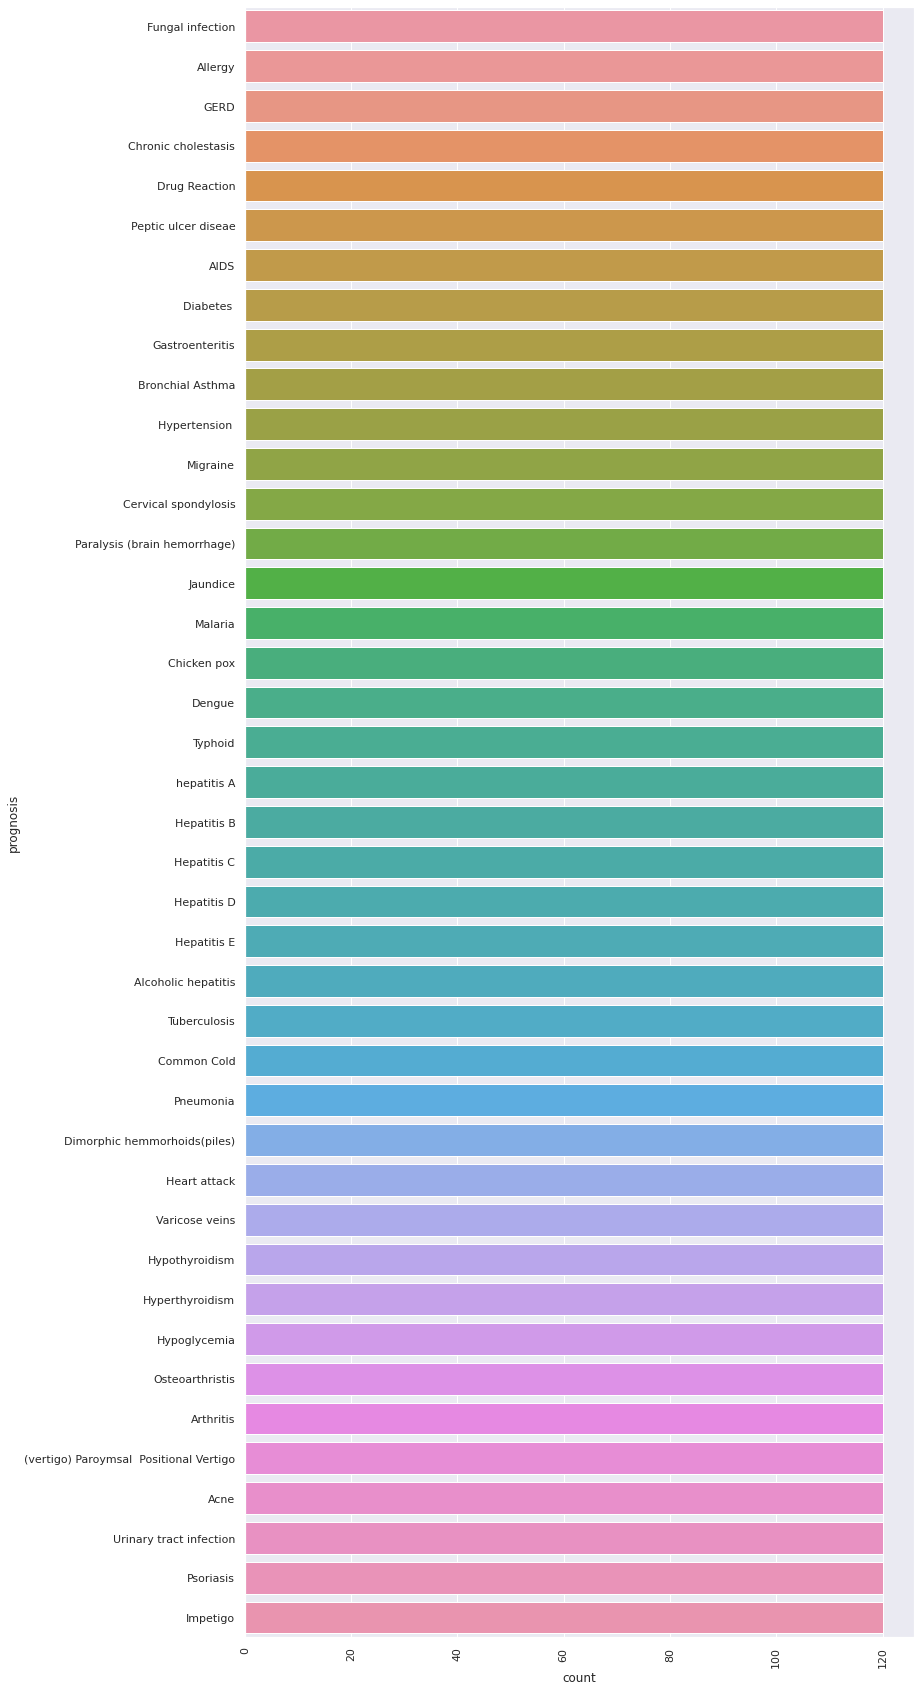

In [8]:
# the data is balanced for classification training. lets see value counts and also visualize them
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,30))
plt.xticks(rotation = 90)
sns.countplot(y="prognosis", data=train_df)
print(train_df["prognosis"].value_counts())

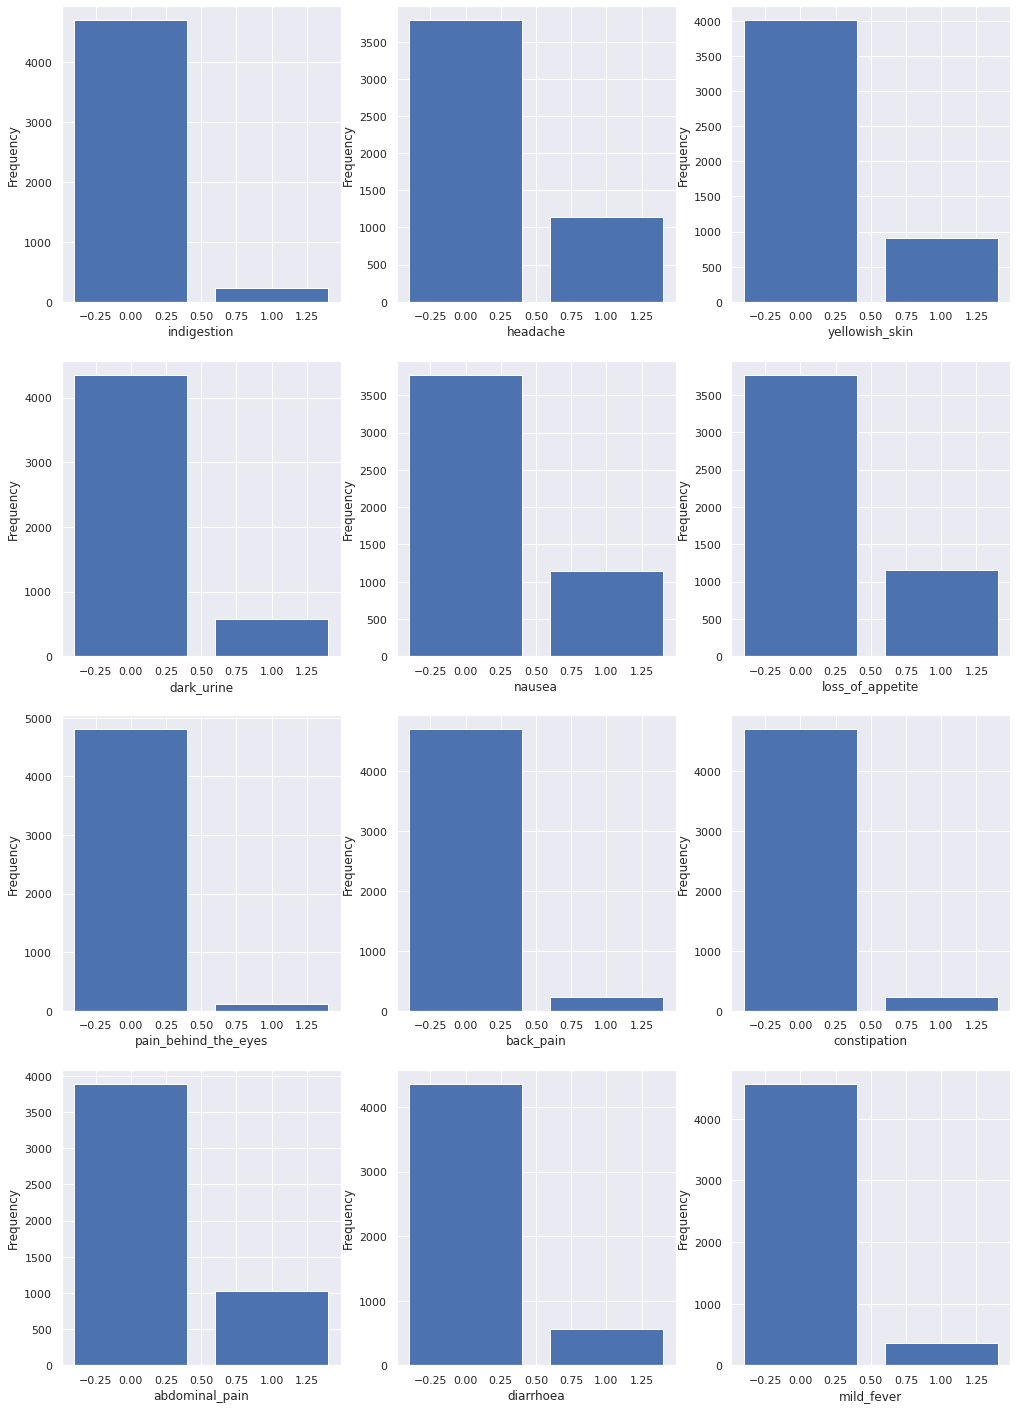

In [9]:
# lets visualize some of features
features = ['indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation',
       'abdominal_pain', 'diarrhoea', 'mild_fever']

plt.figure(figsize = (17,25))
for i, feature in enumerate(features):
    plt.subplot(4,3,i+1)
    plt.bar(train_df[feature].value_counts().index.to_numpy(), train_df[feature].value_counts().values)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.show()

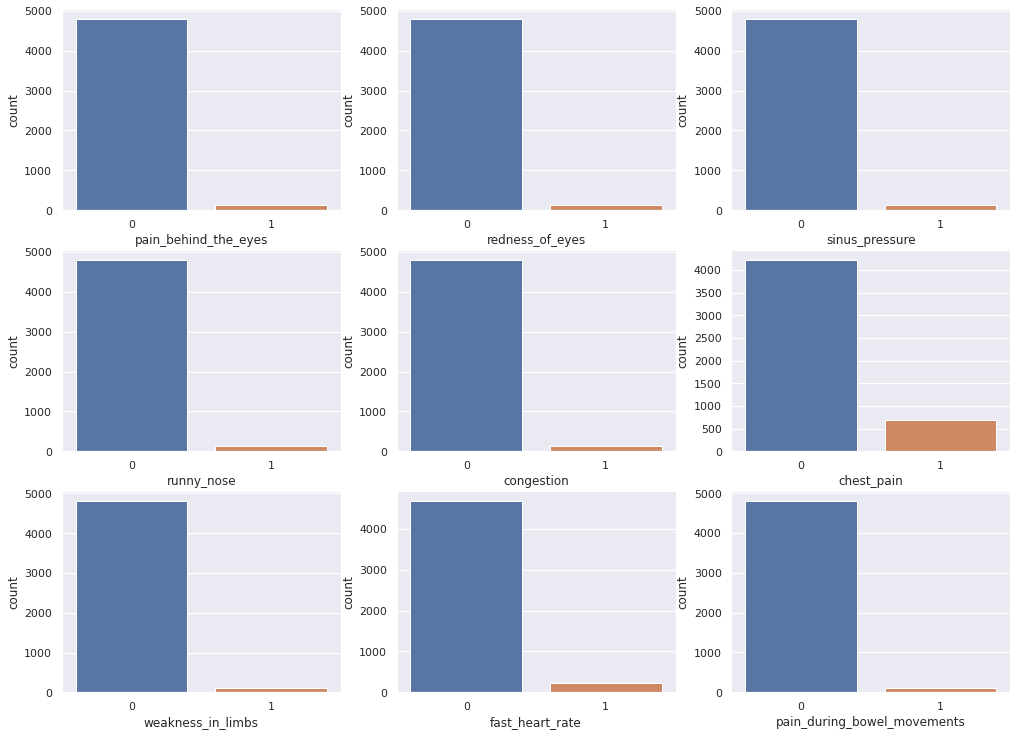

In [10]:
# visualize it with seaborn library one more time
features = ['pain_behind_the_eyes', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion',
       'chest_pain', 'weakness_in_limbs', 'fast_heart_rate',
       'pain_during_bowel_movements']

plt.figure(figsize = (17,17))
for i, feature in enumerate(features):
    plt.subplot(4,3,i+1)
    sns.countplot(x = feature, data = train_df)
    plt.xlabel(feature)
plt.show()

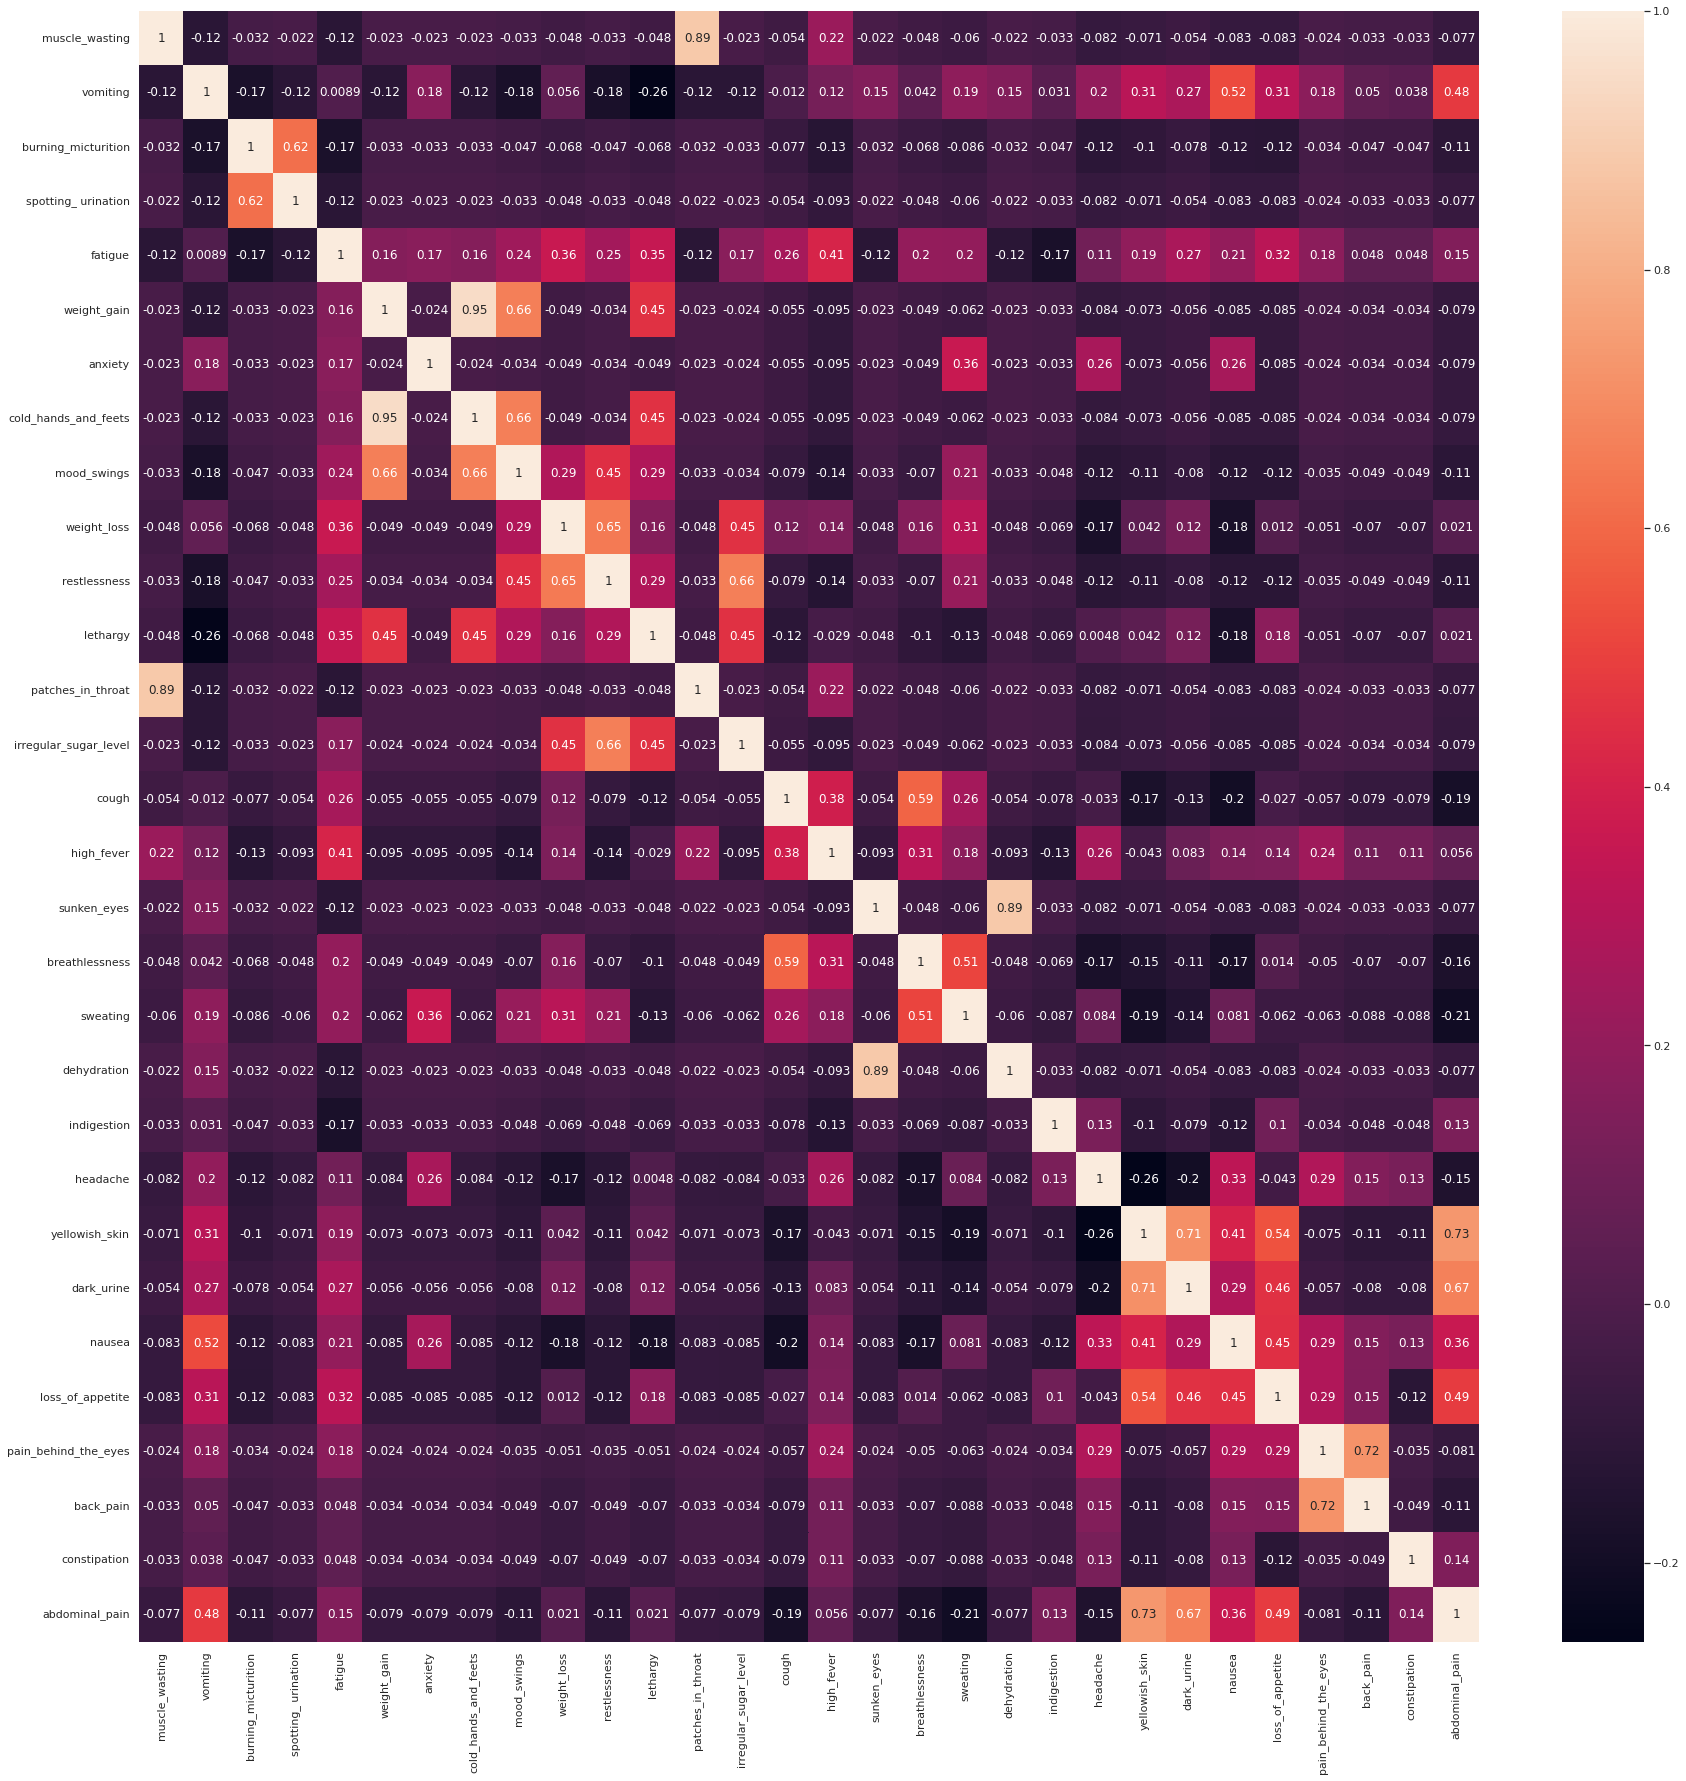

In [11]:
# linear relationships between some of features using correlation heatmap: for example which symptoms occur together?
df_corr = train_df.iloc[:, 10:40]
plt.figure(figsize = (30, 30))
sns.heatmap(df_corr.corr(), annot = True)
plt.show()

###Data Cleaning

In [12]:
# drop unnamed feature from train data
train_df.drop("Unnamed: 133", axis = 1, inplace = True)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [14]:
train_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection


##KNN

In [18]:
# Modelling
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  # k = 5
x_train, y_train = train_df.loc[:,train_df.columns != "prognosis"], train_df.loc[:,"prognosis"]
x_test, y_test = test_df.loc[:,train_df.columns != "prognosis"], test_df.loc[:,"prognosis"]
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("Prediction list: {}".format(prediction[0:20]))
print("With KNN (K=5) accuracy is: ",knn.score(x_test, y_test))

Prediction list: ['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A']
With KNN (K=5) accuracy is:  1.0


In [19]:
neighbors = np.arange(1,25)   # for k tuning
train_accuracy = []
test_accuracy = []
# Loop for different k values
for i, k in enumerate(neighbors):
    # k from 1 to 25 (excluded)
    knn = KNeighborsClassifier(n_neighbors = k)
    # fit the knn
    knn.fit(x_train, y_train)
    # train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

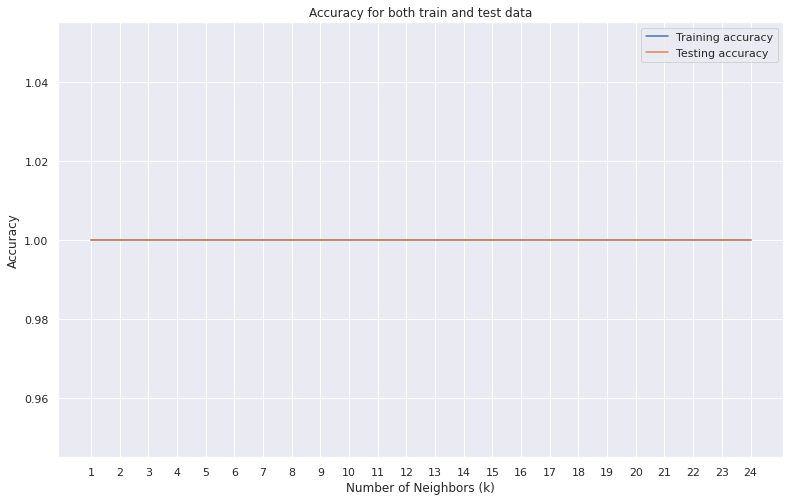

In [20]:
# Plot the accuracies
plt.figure(figsize = (13,8))
plt.plot(neighbors, train_accuracy, label = "Training accuracy")
plt.plot(neighbors, test_accuracy, label = "Testing accuracy")
plt.legend()
plt.title("Accuracy for both train and test data")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(neighbors)
plt.show()

In [21]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
k = 5 # for K-fold cross validation
cv_result = cross_val_score(knn, x_train, y_train, cv = k) # uses R^2 score
print("CV scores: ", cv_result)
print("CV scores average: ", np.sum(cv_result)/len(cv_result))

CV scores:  [1. 1. 1. 1. 1.]
CV scores average:  1.0


##Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train, y_train)
dt.predict(x_test)
dscore=dt.score(x_test, y_test)
dscore

0.9761904761904762

In [35]:
print("Percentage of accuracy is:",dscore*100)

Percentage of accuracy is: 97.61904761904762


##Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42, n_estimators = 100)
rfc.fit(x_train, y_train)
rfc.predict(x_test)
rscore=rfc.score(x_test, y_test)
rscore

0.9761904761904762

In [37]:
print("Percentage of accuracy is:",rscore*100)

Percentage of accuracy is: 97.61904761904762
